# YOLO v3 Object Detection

we can't reasonably train the YOLOv3 network ourself, instead we will use a pre-established version.

CODE SOURCE: https://github.com/xiaochus/YOLOv3

REFERENCE (for original YOLOv3): 

        @article{YOLOv3,  
              title={YOLOv3: An Incremental Improvement},  
              author={J Redmon, A Farhadi },
              year={2018} 

In [1]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO
import matplotlib.pyplot as plt
import os
import colorsys
import random
import math

In [2]:
def process_image(img):
    
    """
    Resize, reduce and expand image.
    
    # Argument:
        img : original image.
        
    # Returns
        image : ndarray(64, 64, 3), processed image.
    """
    
    image  = cv2.resize(img, (416, 416), interpolation = cv2.INTER_CUBIC)
    image  = np.array(image, dtype = 'float32')
    image /= 255.
    image  = np.expand_dims(image, axis = 0)
    
    return image

In [3]:
def get_classes(file):
    
    """
    Get classes name.
    
    # Argument:
        file : classes name for database.
        
    # Returns
        class_names : List, classes name.
    """
    
    with open(file) as f:
        class_names = f.readlines()
        
    class_names = [c.strip() for c in class_names]
    
    return class_names

In [4]:
def generate_colors(class_names):
        hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
        colors     = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        colors     = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
        random.seed(84)  # Fixed seed for consistent colors across runs.
        random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
        random.seed(None)  # Reset seed to default.
        return colors

In [5]:
def draw(image, boxes, scores, classes, all_classes, colors):
    
    """
    Draw the boxes on the image.
    
    # Argument:
        image       : original image.
        boxes       : ndarray, boxes of objects.
        classes     : ndarray, classes of objects.
        scores      : ndarray, scores of objects.
        all_classes : all classes name.
    """
    
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box
        top        = max(0, np.floor(x + 0.5).astype(int))
        left       = max(0, np.floor(y + 0.5).astype(int))
        right      = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom     = min(image.shape[0], np.floor(y + h + 0.5).astype(int))
        thickn     = math.ceil((w + h) / 200)
        cv2.rectangle(image, 
                      (top, left), 
                      (right, bottom), 
                      color     = colors[cl], 
                      thickness = thickn)
        # cv2.putText(image, 
        #             text      = f"{all_classes[cl]} {score:.2f}",
        #             org       = (top + 5, left + 5), 
        #             fontFace  = cv2.FONT_HERSHEY_SIMPLEX,
        #             fontScale = 0.7, 
        #             color     = (255, 255, 255), 
        #             thickness = thickn, 
        #             lineType  = cv2.LINE_AA)

        print(f'class               : {all_classes[cl]}')
        print(f'accuracy            : % {(score * 100):.2f}')
        print(f'bounding box x1, y1 : {box[0]:.2f}, {box[1]:.2f}')
        print(f'bounding box w, h   : {box[2]:.2f}, {box[3]:.2f}')
        print(f'bounding box x2, y2 : {(box[0] + box[2]):.2f}, {(box[1] + box[3]):.2f}\n')

In [6]:
def detect_image(image, yolo, all_classes):
    
    """
    Use yolo v3 to detect images.
    # Argument:
        image       : original image.
        yolo        : YOLO, yolo model.
        all_classes : all classes name.

    # Returns:
        image : processed image.
    """
    colors                 = generate_colors(all_classes)
    pimage                 = process_image(image)
    boxes, classes, scores = yolo.predict(pimage, image.shape)

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes, colors)

    return image

In [7]:
yolo        = YOLO(0.6, 0.5)
file        = 'data/coco_classes.txt'
all_classes = get_classes(file)

In [8]:
rootdir = 'images/test/'
for subdir, dirs, files in os.walk(rootdir):
    for f in files:
        print(f)

15.jpg
16.jpg
17.jpg
18.jpg
jingxiang-gao-489454-unsplash.jpg
maxresdefault.jpg
nhau.jpg
original.jpg
ovelha-706x432.jpg
person.jpg
photo-1511117833895-4b473c0b85d6.jpg
photo-1528709024086-98a7672e0b9d.jpg
photo-1535979863199-3c77338429a0.jpg
pic_1_-_small.jpg
r-grazing-cover-300.jpg
sally+professional+pic.jpg
sau-se-rett-i-kamera.jpg
sheep-1672_960_720.jpg
sheep-2641172_1920.jpg
sheep-2641172_960_720.jpg
sheep-300x225.jpg
sheep-348956_640.jpg
sheep-4077898_960_720.jpg
sheep-957523_960_720.jpg
sheep-983133_960_720.jpg
sheep-and-lamb.jpg
sheep-closeup-eating-grass.jpg
sheep-crop.jpg
sheep-in-summer-meadow-elena-elisseeva.jpg
sheep-looking-at-you.jpg
sheep-picture-141095-3623502.jpg
sheep-the-biggest-animals-kingdom.jpg
sheep-white-offal.jpg
sheep.jpg
sheep1.jpg
sheep2.jpg
sheep3.jpg
sheeponroadiceland.jpg
sheep_buckets.jpg
sheep_goats_io.png
shutterstock_112282007-e1540937279859.jpg
sq-3-300x300.jpg
stanza_artist-sheep.jpg
story-32114-32114-xlarge.jpg
texel-1908874_960_720.jpg
why-the-i

-------------

# Detecting on Images

picture number      : 1

class               : sheep
accuracy            : % 90.55
bounding box x1, y1 : 12.40, 8.07
bounding box w, h   : 189.96, 156.64
bounding box x2, y2 : 202.36, 164.71



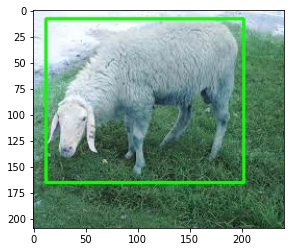

-------------------------------------------------------------------------------
picture number      : 2

class               : sheep
accuracy            : % 99.85
bounding box x1, y1 : 37.17, 21.54
bounding box w, h   : 196.21, 154.37
bounding box x2, y2 : 233.39, 175.90



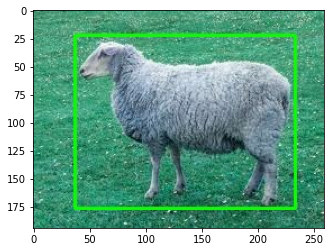

-------------------------------------------------------------------------------
picture number      : 3

class               : sheep
accuracy            : % 98.09
bounding box x1, y1 : 274.52, 23.28
bounding box w, h   : 1140.53, 879.96
bounding box x2, y2 : 1415.04, 903.24



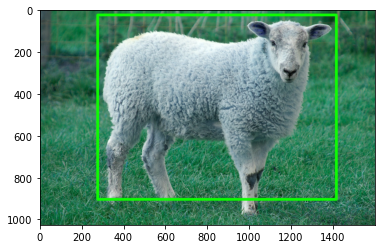

-------------------------------------------------------------------------------
picture number      : 4

class               : sheep
accuracy            : % 94.08
bounding box x1, y1 : 23.73, 17.86
bounding box w, h   : 221.53, 165.43
bounding box x2, y2 : 245.26, 183.29



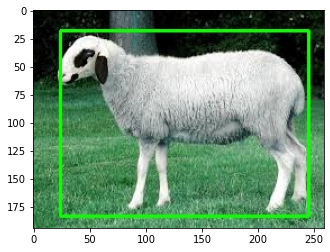

-------------------------------------------------------------------------------
picture number      : 5

class               : person
accuracy            : % 64.27
bounding box x1, y1 : 2523.89, 1482.56
bounding box w, h   : 619.41, 1302.60
bounding box x2, y2 : 3143.30, 2785.16

class               : bicycle
accuracy            : % 83.72
bounding box x1, y1 : 2877.70, 2008.98
bounding box w, h   : 1303.70, 717.75
bounding box x2, y2 : 4181.39, 2726.73



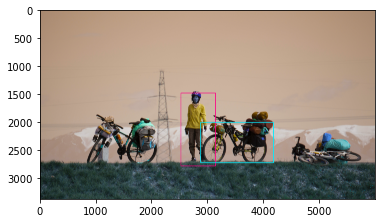

-------------------------------------------------------------------------------
picture number      : 6

class               : person
accuracy            : % 99.15
bounding box x1, y1 : 859.14, 69.77
bounding box w, h   : 194.48, 314.77
bounding box x2, y2 : 1053.62, 384.55

class               : sheep
accuracy            : % 93.73
bounding box x1, y1 : 631.74, 191.80
bounding box w, h   : 352.51, 188.18
bounding box x2, y2 : 984.25, 379.98



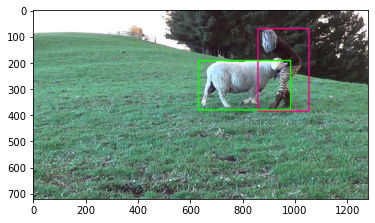

-------------------------------------------------------------------------------
picture number      : 7

class               : sheep
accuracy            : % 80.54
bounding box x1, y1 : 151.09, 67.09
bounding box w, h   : 175.27, 159.50
bounding box x2, y2 : 326.36, 226.59



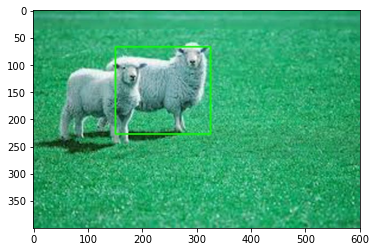

-------------------------------------------------------------------------------
picture number      : 8

class               : sheep
accuracy            : % 97.66
bounding box x1, y1 : 133.90, 18.88
bounding box w, h   : 469.48, 362.99
bounding box x2, y2 : 603.38, 381.87



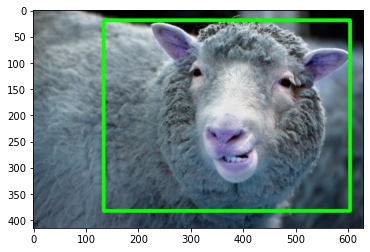

-------------------------------------------------------------------------------
picture number      : 9

class               : sheep
accuracy            : % 95.85
bounding box x1, y1 : 175.58, 89.75
bounding box w, h   : 467.30, 340.38
bounding box x2, y2 : 642.88, 430.14



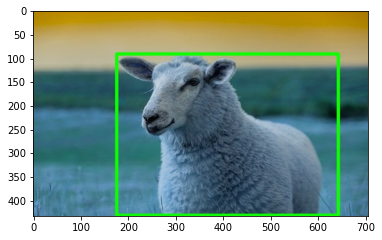

-------------------------------------------------------------------------------
picture number      : 10

class               : person
accuracy            : % 99.90
bounding box x1, y1 : 187.66, 82.94
bounding box w, h   : 91.79, 306.85
bounding box x2, y2 : 279.45, 389.79

class               : horse
accuracy            : % 99.72
bounding box x1, y1 : 396.36, 137.40
bounding box w, h   : 215.85, 208.32
bounding box x2, y2 : 612.21, 345.72

class               : dog
accuracy            : % 99.78
bounding box x1, y1 : 61.19, 263.39
bounding box w, h   : 145.37, 88.43
bounding box x2, y2 : 206.56, 351.82



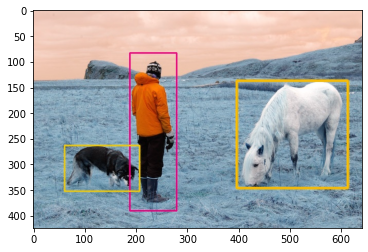

-------------------------------------------------------------------------------
picture number      : 11

class               : sheep
accuracy            : % 86.80
bounding box x1, y1 : 113.64, 200.72
bounding box w, h   : 305.86, 458.55
bounding box x2, y2 : 419.51, 659.26

class               : sheep
accuracy            : % 85.21
bounding box x1, y1 : 472.03, 200.79
bounding box w, h   : 266.32, 475.65
bounding box x2, y2 : 738.34, 676.45

class               : sheep
accuracy            : % 73.24
bounding box x1, y1 : 360.66, 198.99
bounding box w, h   : 179.27, 396.85
bounding box x2, y2 : 539.93, 595.84

class               : sheep
accuracy            : % 60.63
bounding box x1, y1 : 699.16, 180.60
bounding box w, h   : 168.49, 439.31
bounding box x2, y2 : 867.65, 619.92



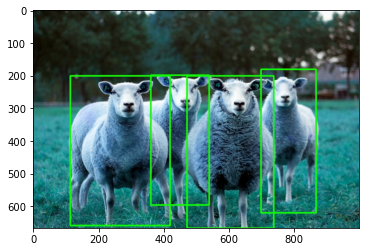

-------------------------------------------------------------------------------
picture number      : 12

class               : sheep
accuracy            : % 99.83
bounding box x1, y1 : 296.07, 561.63
bounding box w, h   : 705.29, 463.39
bounding box x2, y2 : 1001.36, 1025.02



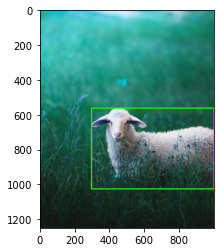

-------------------------------------------------------------------------------
picture number      : 13

class               : sheep
accuracy            : % 85.86
bounding box x1, y1 : 416.75, 120.50
bounding box w, h   : 322.10, 525.84
bounding box x2, y2 : 738.85, 646.34



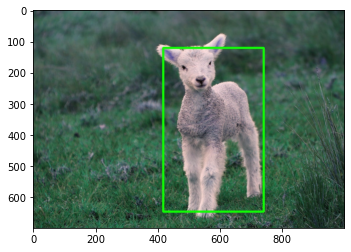

-------------------------------------------------------------------------------
picture number      : 14

class               : sheep
accuracy            : % 99.35
bounding box x1, y1 : 32.21, 46.77
bounding box w, h   : 323.44, 227.03
bounding box x2, y2 : 355.65, 273.80



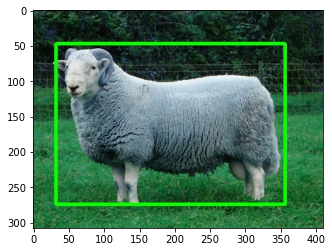

-------------------------------------------------------------------------------
picture number      : 15

class               : sheep
accuracy            : % 70.08
bounding box x1, y1 : 102.79, 90.66
bounding box w, h   : 103.65, 145.70
bounding box x2, y2 : 206.45, 236.37



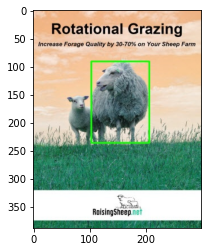

-------------------------------------------------------------------------------
picture number      : 16

class               : sheep
accuracy            : % 98.91
bounding box x1, y1 : 73.78, 129.78
bounding box w, h   : 609.31, 758.04
bounding box x2, y2 : 683.09, 887.82



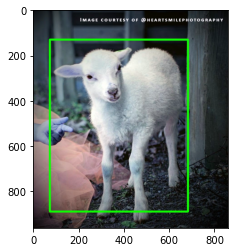

-------------------------------------------------------------------------------
picture number      : 17

class               : sheep
accuracy            : % 99.73
bounding box x1, y1 : 875.46, 266.73
bounding box w, h   : 473.04, 785.67
bounding box x2, y2 : 1348.50, 1052.40



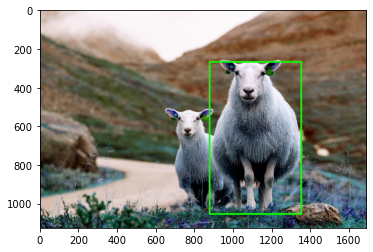

-------------------------------------------------------------------------------
picture number      : 18

class               : sheep
accuracy            : % 98.27
bounding box x1, y1 : 605.00, 182.01
bounding box w, h   : 223.03, 240.60
bounding box x2, y2 : 828.03, 422.60



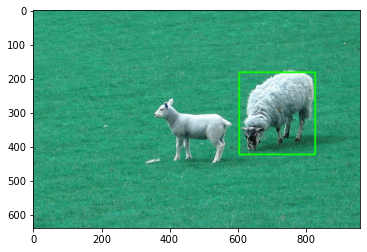

-------------------------------------------------------------------------------
picture number      : 19

class               : sheep
accuracy            : % 99.92
bounding box x1, y1 : 561.43, 59.35
bounding box w, h   : 484.77, 651.10
bounding box x2, y2 : 1046.20, 710.45

class               : sheep
accuracy            : % 98.60
bounding box x1, y1 : 183.85, 296.64
bounding box w, h   : 403.06, 472.11
bounding box x2, y2 : 586.92, 768.76



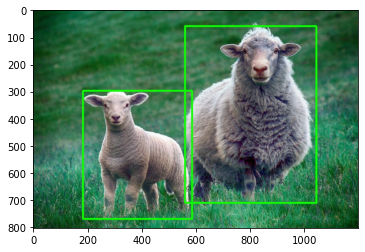

-------------------------------------------------------------------------------
picture number      : 20

class               : sheep
accuracy            : % 99.90
bounding box x1, y1 : 447.70, 48.02
bounding box w, h   : 388.82, 519.77
bounding box x2, y2 : 836.52, 567.79

class               : sheep
accuracy            : % 99.19
bounding box x1, y1 : 147.09, 236.49
bounding box w, h   : 323.62, 377.55
bounding box x2, y2 : 470.71, 614.04



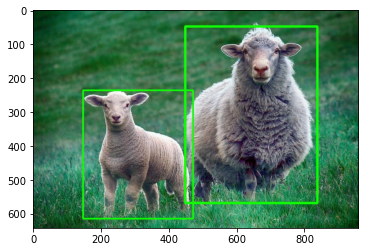

-------------------------------------------------------------------------------
picture number      : 21

class               : person
accuracy            : % 95.36
bounding box x1, y1 : 202.46, 74.68
bounding box w, h   : 40.07, 85.45
bounding box x2, y2 : 242.53, 160.12

class               : sheep
accuracy            : % 63.98
bounding box x1, y1 : 131.28, 114.97
bounding box w, h   : 73.95, 101.15
bounding box x2, y2 : 205.23, 216.11



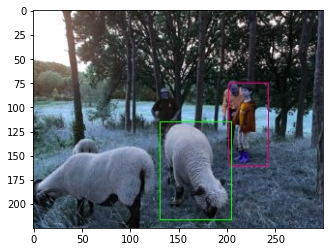

-------------------------------------------------------------------------------
picture number      : 22

class               : sheep
accuracy            : % 99.61
bounding box x1, y1 : 61.84, 54.55
bounding box w, h   : 541.58, 321.72
bounding box x2, y2 : 603.42, 376.26



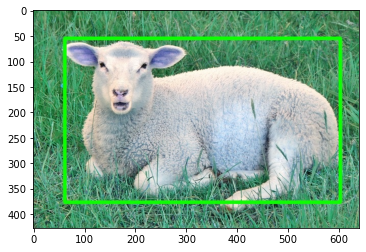

-------------------------------------------------------------------------------
picture number      : 23



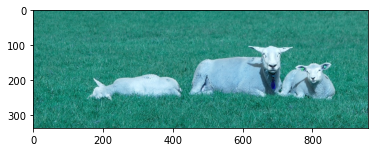

-------------------------------------------------------------------------------
picture number      : 24

class               : sheep
accuracy            : % 88.74
bounding box x1, y1 : 374.35, 299.28
bounding box w, h   : 159.95, 199.83
bounding box x2, y2 : 534.31, 499.11



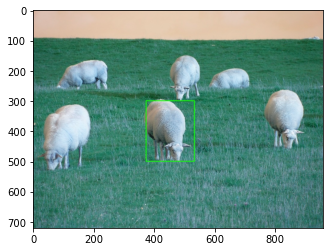

-------------------------------------------------------------------------------
picture number      : 25

class               : sheep
accuracy            : % 91.87
bounding box x1, y1 : 341.49, 217.78
bounding box w, h   : 218.51, 334.25
bounding box x2, y2 : 560.01, 552.03

class               : sheep
accuracy            : % 60.32
bounding box x1, y1 : 435.61, 23.77
bounding box w, h   : 278.37, 261.75
bounding box x2, y2 : 713.98, 285.52



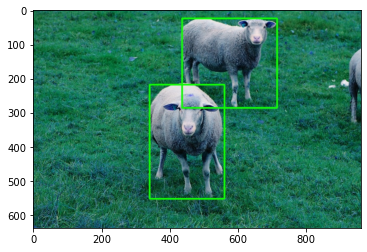

-------------------------------------------------------------------------------
picture number      : 26

class               : sheep
accuracy            : % 99.31
bounding box x1, y1 : 82.03, 92.89
bounding box w, h   : 880.64, 894.27
bounding box x2, y2 : 962.68, 987.16



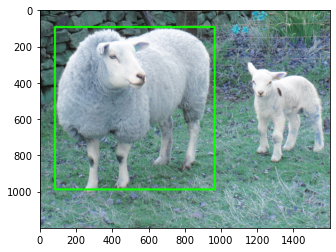

-------------------------------------------------------------------------------
picture number      : 27

class               : sheep
accuracy            : % 98.61
bounding box x1, y1 : 16.45, 38.41
bounding box w, h   : 483.55, 344.55
bounding box x2, y2 : 500.00, 382.96



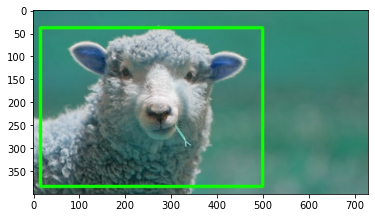

-------------------------------------------------------------------------------
picture number      : 28

class               : horse
accuracy            : % 72.24
bounding box x1, y1 : 267.11, 3.62
bounding box w, h   : 298.36, 432.79
bounding box x2, y2 : 565.46, 436.41



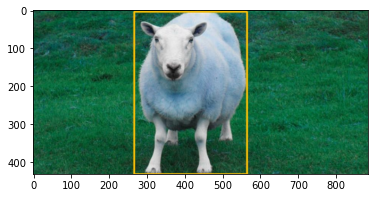

-------------------------------------------------------------------------------
picture number      : 29

class               : sheep
accuracy            : % 99.63
bounding box x1, y1 : 115.32, 136.52
bounding box w, h   : 640.69, 497.76
bounding box x2, y2 : 756.01, 634.28



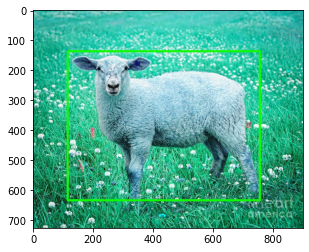

-------------------------------------------------------------------------------
picture number      : 30

class               : sheep
accuracy            : % 98.06
bounding box x1, y1 : 86.25, 123.67
bounding box w, h   : 779.64, 532.03
bounding box x2, y2 : 865.89, 655.70



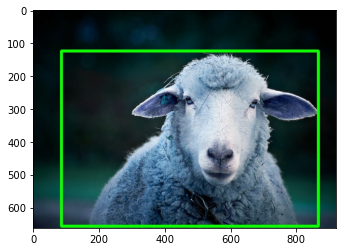

-------------------------------------------------------------------------------
picture number      : 31

class               : sheep
accuracy            : % 91.33
bounding box x1, y1 : 232.26, 40.85
bounding box w, h   : 205.31, 232.76
bounding box x2, y2 : 437.57, 273.61

class               : sheep
accuracy            : % 79.57
bounding box x1, y1 : 70.39, 129.62
bounding box w, h   : 94.02, 159.50
bounding box x2, y2 : 164.41, 289.12

class               : sheep
accuracy            : % 72.95
bounding box x1, y1 : 178.10, 139.62
bounding box w, h   : 86.30, 145.41
bounding box x2, y2 : 264.40, 285.03



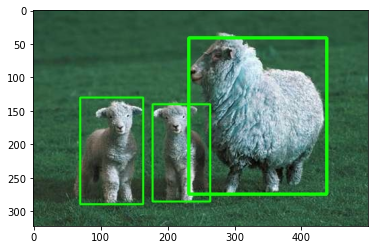

-------------------------------------------------------------------------------
picture number      : 32

class               : sheep
accuracy            : % 99.02
bounding box x1, y1 : 165.44, 61.81
bounding box w, h   : 579.49, 561.49
bounding box x2, y2 : 744.94, 623.30



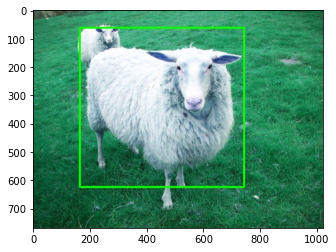

-------------------------------------------------------------------------------
picture number      : 33

class               : sheep
accuracy            : % 99.88
bounding box x1, y1 : 120.33, 10.06
bounding box w, h   : 396.62, 306.89
bounding box x2, y2 : 516.95, 316.95



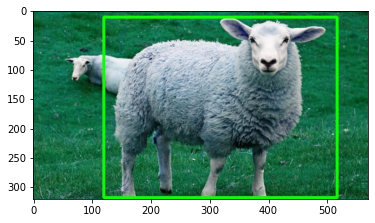

-------------------------------------------------------------------------------
picture number      : 34

class               : sheep
accuracy            : % 99.73
bounding box x1, y1 : 179.35, 108.15
bounding box w, h   : 643.82, 683.41
bounding box x2, y2 : 823.17, 791.56



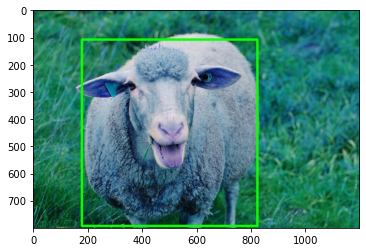

-------------------------------------------------------------------------------
picture number      : 35

class               : horse
accuracy            : % 63.71
bounding box x1, y1 : 323.04, 41.88
bounding box w, h   : 265.89, 346.92
bounding box x2, y2 : 588.94, 388.80

class               : sheep
accuracy            : % 91.53
bounding box x1, y1 : 64.39, 116.13
bounding box w, h   : 194.10, 271.59
bounding box x2, y2 : 258.49, 387.72

class               : sheep
accuracy            : % 89.40
bounding box x1, y1 : 308.54, 24.78
bounding box w, h   : 273.88, 364.54
bounding box x2, y2 : 582.42, 389.32



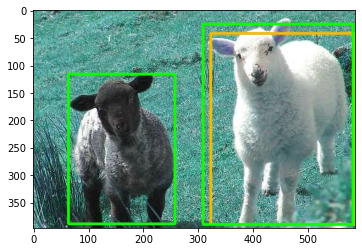

-------------------------------------------------------------------------------
picture number      : 36

class               : sheep
accuracy            : % 99.61
bounding box x1, y1 : 76.18, 30.19
bounding box w, h   : 211.22, 196.51
bounding box x2, y2 : 287.40, 226.70



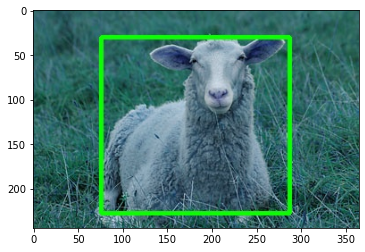

-------------------------------------------------------------------------------
picture number      : 37

class               : sheep
accuracy            : % 99.58
bounding box x1, y1 : 35.64, 12.21
bounding box w, h   : 407.43, 342.15
bounding box x2, y2 : 443.07, 354.35



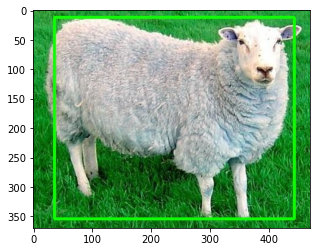

-------------------------------------------------------------------------------
picture number      : 38

class               : sheep
accuracy            : % 98.54
bounding box x1, y1 : 95.39, 183.91
bounding box w, h   : 620.89, 598.97
bounding box x2, y2 : 716.28, 782.88



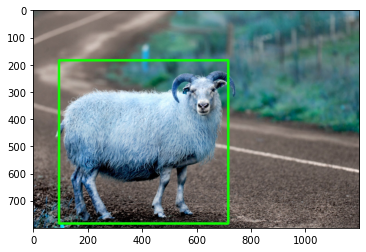

-------------------------------------------------------------------------------
picture number      : 39

class               : sheep
accuracy            : % 97.79
bounding box x1, y1 : 71.37, 40.61
bounding box w, h   : 343.48, 244.55
bounding box x2, y2 : 414.85, 285.16



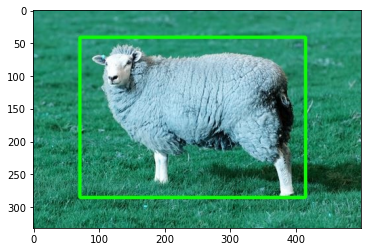

-------------------------------------------------------------------------------
picture number      : 40

class               : sheep
accuracy            : % 96.93
bounding box x1, y1 : 687.35, 100.84
bounding box w, h   : 249.38, 253.97
bounding box x2, y2 : 936.74, 354.82

class               : sheep
accuracy            : % 89.23
bounding box x1, y1 : 429.51, 64.60
bounding box w, h   : 259.10, 294.13
bounding box x2, y2 : 688.61, 358.73



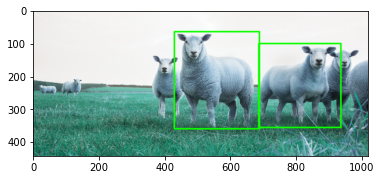

-------------------------------------------------------------------------------
picture number      : 41

class               : sheep
accuracy            : % 97.66
bounding box x1, y1 : 569.88, 65.14
bounding box w, h   : 343.46, 442.91
bounding box x2, y2 : 913.34, 508.05

class               : sheep
accuracy            : % 89.78
bounding box x1, y1 : 89.91, 65.72
bounding box w, h   : 511.31, 461.83
bounding box x2, y2 : 601.22, 527.55



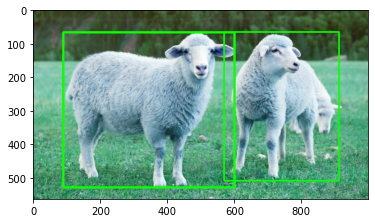

-------------------------------------------------------------------------------
picture number      : 42

class               : horse
accuracy            : % 91.58
bounding box x1, y1 : 49.87, 105.81
bounding box w, h   : 211.61, 117.45
bounding box x2, y2 : 261.47, 223.26



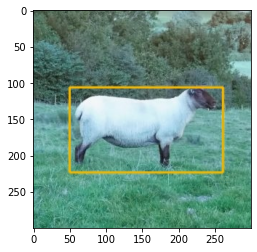

-------------------------------------------------------------------------------
picture number      : 43

class               : sheep
accuracy            : % 93.53
bounding box x1, y1 : 447.89, 179.89
bounding box w, h   : 430.23, 328.11
bounding box x2, y2 : 878.11, 508.00



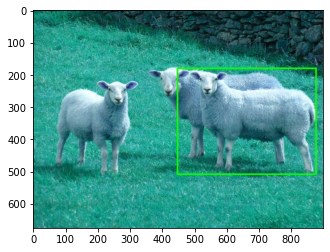

-------------------------------------------------------------------------------
picture number      : 44

class               : sheep
accuracy            : % 98.83
bounding box x1, y1 : 106.02, 23.87
bounding box w, h   : 564.26, 407.44
bounding box x2, y2 : 670.28, 431.31



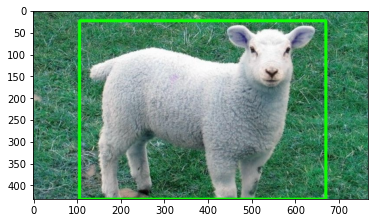

-------------------------------------------------------------------------------
picture number      : 45

class               : sheep
accuracy            : % 94.30
bounding box x1, y1 : 231.25, 181.32
bounding box w, h   : 205.88, 364.35
bounding box x2, y2 : 437.13, 545.67

class               : sheep
accuracy            : % 72.60
bounding box x1, y1 : 517.03, 217.17
bounding box w, h   : 231.01, 373.20
bounding box x2, y2 : 748.04, 590.36



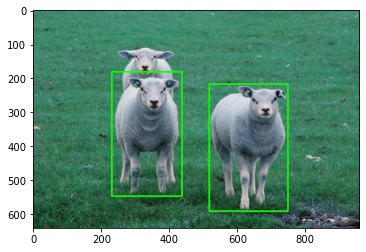

-------------------------------------------------------------------------------
picture number      : 46

class               : sheep
accuracy            : % 94.52
bounding box x1, y1 : 298.42, 308.12
bounding box w, h   : 173.05, 239.73
bounding box x2, y2 : 471.47, 547.85

class               : sheep
accuracy            : % 63.20
bounding box x1, y1 : 434.37, 273.61
bounding box w, h   : 475.81, 371.80
bounding box x2, y2 : 910.19, 645.40



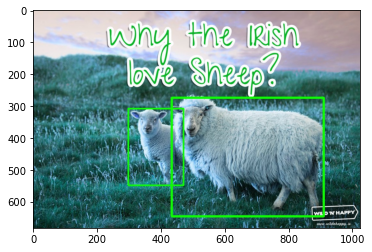

-------------------------------------------------------------------------------
picture number      : 47



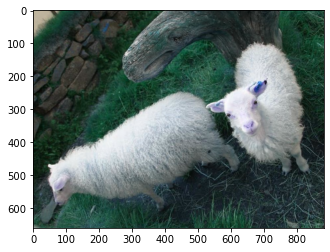

-------------------------------------------------------------------------------


In [9]:
rootdir    = 'images/test/'
pic_number = 1
for subdir, dirs, files in os.walk(rootdir):
    for f in files:
        print(f"picture number      : {pic_number}\n")
        pic_number += 1
        path  = 'images/test/' + f
        image = cv2.imread(path)
        image = detect_image(image, yolo, all_classes)
        cv2.imwrite('images/res/' + f, image)
        img   = cv2.imread('images/res/' + f)
        plt.imshow(img)
        plt.show()
        print('-------------------------------------------------------------------------------')